In [4]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

In [5]:
def input_parameters(no_parameters):
    '''
    By parameters I mean linguistic variables
    Input: The number of parameters 
    Ex: no_parameters=3
    Output: Function returns the number of parameters, the dictionary parameters and the dictionary ranges
    Ex: parameters={1: 'Food', 2: 'Service', 3: 'Ambience'},
        ranges={'Food':[0.0,0.01.0.02,....,9.99,10.0],'Service':[0.0,0.01.0.02,....,9.99,10.0],'Ambience':[0.0,0.01.0.02,....,9.99,10.0]}'''
    parameters={}
    for i in range(no_parameters):
        parameters[i+1]=input(f"Enter parameter {i+1}:")
    #dictionary for upper and lower bounds of each parameter
    bounds={}
    for i in range(no_parameters):
        bounds[i+1]=input(f"Enter lower bound, upper bound for range of parameter {parameters[i+1]}:").split(" ")
    #dictionary for range of each parameter
    ranges={}
    #step for each x range of each parameter
    step=0.01
    for i in bounds.keys():
        ranges[parameters[i]]=list(np.around(np.arange(float(bounds[i][0]),float(bounds[i][1]),step),2))

    return (no_parameters,parameters,ranges)
    
    

In [6]:
(a,b,c)=input_parameters(3)

Enter parameter 1:Food
Enter parameter 2:Service
Enter parameter 3:Ambience
Enter lower bound, upper bound for range of parameter Food:0 10.01 0.01
Enter lower bound, upper bound for range of parameter Service:0 10.01 0.01
Enter lower bound, upper bound for range of parameter Ambience:0 10.01 0.01


In [7]:
def fuzzification(no_parameters,parameters,ranges):
    '''
    Inputs: The number of parameters, the dicitonary of parameters and the range of each parameter
    Ex: no_parameters=3,
        parameters={1: 'Food', 2: 'Service', 3: 'Ambience'}
        ranges={'Food':[0.0,0.01.0.02,....,9.99,10.0],'Service':[0.0,0.01.0.02,....,9.99,10.0],'Ambience':[0.0,0.01.0.02,....,9.99,10.0]}
    Outputs:
    no_parameters=3
    ranges={'Food':[0.0,0.01.0.02,....,9.99,10.0],'Service':[0.0,0.01.0.02,....,9.99,10.0],'Ambience':[0.0,0.01.0.02,....,9.99,10.0]}
    fuzz_mem={'Food': {'Low': ['trapmf', 'trapmf'],'Medium': ['trapmf', 'trapmf'],'High': ['trapmf', 'trapmf']},'Service': {'Bad': ['trapmf', 'trapmf'],
   'Medium': ['trapmf', 'trapmf'],'Good': ['trapmf', 'trapmf']},'Ambience': {'Poor': ['trapmf', 'trapmf'],'Medium': ['trapmf', 'trapmf'],
   'Good': ['trapmf', 'trapmf']}}
    '''
    #dictionary for counting the number of linguistic values entered for each parameter by the user
    ling_var_count={}
    #dictionary for storing each linguistic value for each parameter entered by the user
    ling_var={}
    for i in range(no_parameters):
        ling_var_count[i+1]=int(input(f"Enter the number of liguistic values for parameter {parameters[i+1]}:"))
        ling_var[i+1]={}
        for j in range(ling_var_count[i+1]):
            ling_var[i+1][j+1]=input(f"Enter linguistic values {j+1} for parameter {parameters[i+1]}:")
    print("Select a membership function from the given options for each linguistic value of each parameter")
    mem_functions={1:'trapmf',2:'trimf',3:'gaussmf'}
    #dictionary to store  membership function for each linguistic value for each parameter
    fuzz_mem={}
    for i in range(no_parameters):
        fuzz_mem[parameters[i+1]]={}
        for j in range(ling_var_count[i+1]):
            fuzz_mem[parameters[i+1]][ling_var[i+1][j+1]]=[]
            print(mem_functions)
            fuzz_mem[parameters[i+1]][ling_var[i+1][j+1]].append(mem_functions[int(input(f"Enter your choice for UMF for linguistic value {ling_var[i+1][j+1]} for parameter {parameters[i+1]}:"))])
            fuzz_mem[parameters[i+1]][ling_var[i+1][j+1]].append(mem_functions[int(input(f"Enter your choice for LMF for linguistic value {ling_var[i+1][j+1]} for parameter {parameters[i+1]}:"))])
    #print(fuzz_mem)
    return (fuzz_mem,ranges,no_parameters)

In [9]:
(d,e,f)=fuzzification(a,b,c)

Enter the number of liguistic values for parameter Food:3
Enter linguistic values 1 for parameter Food:Low
Enter linguistic values 2 for parameter Food:Medium
Enter linguistic values 3 for parameter Food:Good
Enter the number of liguistic values for parameter Service:3
Enter linguistic values 1 for parameter Service:Bad
Enter linguistic values 2 for parameter Service:Medium
Enter linguistic values 3 for parameter Service:Good
Enter the number of liguistic values for parameter Ambience:3
Enter linguistic values 1 for parameter Ambience:Poor
Enter linguistic values 2 for parameter Ambience:Medium
Enter linguistic values 3 for parameter Ambience:Good
Select a membership function from the given options for each linguistic value of each parameter
{1: 'trapmf', 2: 'trimf', 3: 'gaussmf'}
Enter your choice for UMF for linguistic value Low for parameter Food:1
Enter your choice for LMF for linguistic value Low for parameter Food:1
{1: 'trapmf', 2: 'trimf', 3: 'gaussmf'}
Enter your choice for UM

In [10]:
def triLmf(x, abch):
    '''
    returns the triangular lower membership values.
    
    keyword arguments:
    
    x -- x range of the variable
    abch -- list of values with upper bound included
    '''
    
    assert len(abch) == 4, 'abc parameter must have exactly three elements.'
    a, b, c, h = np.r_[abch]     # Zero-indexing in Python
    assert a <= b and b <= c, 'abc requires the three elements a <= b <= c.'

    y = np.zeros(len(x))

    # Left side
    if a != b:
        idx = np.nonzero(np.logical_and(a < x, x < b))[0]
        y[idx] = ((x[idx] - a) / float(b - a)) * h #left side bounded by height h

    # Right side
    if b != c:
        idx = np.nonzero(np.logical_and(b < x, x < c))[0]
        y[idx] = ((c - x[idx]) / float(c - b)) * h #right side bounded by height h

    idx = np.nonzero(x == b)
    y[idx] = h #center part at height h
    return y

def trapLmf(x, abcdh):
    '''
    returns the trapzoidal lower membership values.
    
    keyword arguments:
    
    x -- x range of the variable
    abcdh -- list of values with upper bound included
    '''
    
    assert len(abcdh) == 5, 'abcd parameter must have exactly four elements.'
    a, b, c, d, h = np.r_[abcdh]
    assert a <= b and b <= c and c <= d, 'abcd requires the four elements \
                                          a <= b <= c <= d.'
    y = np.full(np.shape(x),h)

    idx = np.nonzero(x <= b)[0]
    y[idx] = triLmf(x[idx], np.r_[a, b, b, h])

    idx = np.nonzero(x >= c)[0]
    y[idx] = triLmf(x[idx], np.r_[c, c, d, h])

    idx = np.nonzero(x < a)[0]
    y[idx] = np.zeros(len(idx))

    idx = np.nonzero(x > d)[0]
    y[idx] = np.zeros(len(idx))

    return y

def gaussLmf(x, mean, sigma, h):
    '''
    returns the gaussian lower membership values.
    
    keyword arguments:
    
    x -- x range of the variable
    mean -- mean of the graph
    sigma -- standard deviation along the range
    h -- upper bound of the LMF
    '''
    return (np.exp(-((x - mean)**2.) / (2 * sigma**2.)))*h

In [15]:
def mem_func(fuzz_mem,ranges,no_parameters):
    '''
    Inputs:
    no_parameters=3
    ranges={'Food':[0.0,0.01.0.02,....,9.99,10.0],'Service':[0.0,0.01.0.02,....,9.99,10.0],'Ambience':[0.0,0.01.0.02,....,9.99,10.0]}
    fuzz_mem={'Food': {'Low': ['trapmf', 'trapmf'],'Medium': ['trapmf', 'trapmf'],'High': ['trapmf', 'trapmf']},'Service': {'Bad': ['trapmf', 'trapmf'],
   'Medium': ['trapmf', 'trapmf'],'Good': ['trapmf', 'trapmf']},'Ambience': {'Poor': ['trapmf', 'trapmf'],'Medium': ['trapmf', 'trapmf'],
   'Good': ['trapmf', 'trapmf']}}
    Outputs:
    fuzz_mem_values: {'Food': {'Low': {'trapmf': [0.0, 0.0, 2.0, 4.0], 'trapLmf': [0.0, 0.0, 1.5, 3.0, 0.8]}, 
    'Medium': {'trapmf': [2.0, 4.0, 5.0, 7.0], 'trapLmf': [3.5, 4.5, 5.0, 6.5, 0.6]}, 
    'Good': {'trapmf': [6.5, 8.0, 10.0, 10.0], 'trapLmf': [8.5, 9.0, 10.0, 10.0, 0.8]}}, 
    'Service': {'Bad': {'trapmf': [0.0, 0.0, 1.0, 3.0], 'trapLmf': [0.0, 0.0, 0.5, 2.0, 0.6]}, 
    'Medium': {'trapmf': [2.0, 4.5, 6.0, 7.5], 'trapLmf': [3.0, 5.0, 6.0, 7.0, 0.8]}, 
    'Good': {'trapmf': [7.0, 9.0, 10.0, 10.0], 'trapLmf': [8.0, 9.0, 10.0, 10.0, 0.8]}}, 
    'Ambience': {'Poor': {'trapmf': [0.0, 0.0, 2.0, 3.0], 'trapLmf': [0.0, 0.0, 1.5, 2.5, 0.8]}, 
    'Medium': {'trapmf': [4.0, 5.0, 8.0, 9.0], 'trapLmf': [5.0, 5.5, 7.5, 8.0, 0.8]}, 
    'Good': {'trapmf': [8.0, 9.0, 10.0, 10.0], 'trapLmf': [8.0, 9.5, 10.0, 10.0, 0.6]}}}
    
   '''
    #dictionary to store critical values for each membership function value for for each linguistic value for each parameter
    fuzz_mem_values={}
    for i in fuzz_mem.keys():
        fuzz_mem_values[i]={}
        for j in fuzz_mem[i].keys():
            fuzz_mem_values[i][j]={}
            func=['']*2
            critical_pts=[]
            #for UMF
            if(fuzz_mem[i][j][0]=='trapmf'):
                critical_pts.append(input(f"Enter values a,b,c and d of TRAPMF membership function for parameter {i} and linguistic value {j} for UMF:").split(" "))
                func[0]='trapmf'
            elif(fuzz_mem[i][j]=='trimf'):
                critical_pts.append(input(f"Enter values a,b and c of TRIMF membership function for parameter {i} and linguistic value {j} for UMF:").split(" "))
                func[0]='trimf'
            else:
                critical_pts.append(input(f"Enter values mean and sigma of GAUSSMF membership function for parameter {i} and linguistic value {j} for UMF:").split(" "))
                func[0]='gaussmf'
            #print(fuzz_mem[i][j][1])
            #for LMF
            if(fuzz_mem[i][j][1]=='trapmf'): 
                critical_pts.append(input(f"Enter values a,b,c,d and height of TRAPMF membership function for parameter {i} and linguistic value {j} for LMF:").split(" "))
                func[1]='trapLmf'
            elif(fuzz_mem[i][j][1]=='trimf'):
                critical_pts.append(input(f"Enter values a,b,c and height of TRIMF membership function for parameter {i} and linguistic value {j} for LMF:").split(" "))
                func[1]='triLmf'
            else:
                critical_pts.append(input(f"Enter values mean,sigma and height of GAUSSMF membership function for parameter {i} and linguistic value {j} for LMF:").split(" "))
                func[1]='gaussLmf'
                
            for k in range(len(critical_pts)):
                for l in range(len(critical_pts[k])):
                    critical_pts[k][l]=float(critical_pts[k][l])
            fuzz_mem_values[i][j][func[0]]=critical_pts[0]
            fuzz_mem_values[i][j][func[1]]=critical_pts[1]
    #print(fuzz_mem_values)
    return (fuzz_mem_values,no_parameters,ranges)

In [40]:
def fuzz_values(fuzz_mem_values,no_parameters,ranges):
    '''
    Inputs:
    fuzz_mem_values = {'Food': {'Low': {'trapmf': [0.0, 0.0, 2.0, 4.0], 'trapLmf': [0.0, 0.0, 1.5, 3.0, 0.8]}, 
    'Medium': {'trapmf': [2.0, 4.0, 5.0, 7.0], 'trapLmf': [3.5, 4.5, 5.0, 6.5, 0.6]}, 
    'Good': {'trapmf': [6.5, 8.0, 10.0, 10.0], 'trapLmf': [8.5, 9.0, 10.0, 10.0, 0.8]}}, 
    'Service': {'Bad': {'trapmf': [0.0, 0.0, 1.0, 3.0], 'trapLmf': [0.0, 0.0, 0.5, 2.0, 0.6]}, 
    'Medium': {'trapmf': [2.0, 4.5, 6.0, 7.5], 'trapLmf': [3.0, 5.0, 6.0, 7.0, 0.8]}, 
    'Good': {'trapmf': [7.0, 9.0, 10.0, 10.0], 'trapLmf': [8.0, 9.0, 10.0, 10.0, 0.8]}}, 
    'Ambience': {'Poor': {'trapmf': [0.0, 0.0, 2.0, 3.0], 'trapLmf': [0.0, 0.0, 1.5, 2.5, 0.8]}, 
    'Medium': {'trapmf': [4.0, 5.0, 8.0, 9.0], 'trapLmf': [5.0, 5.5, 7.5, 8.0, 0.8]}, 
    'Good': {'trapmf': [8.0, 9.0, 10.0, 10.0], 'trapLmf': [8.0, 9.5, 10.0, 10.0, 0.6]}}}
    no_parameters = 3
    ranges = {'Food':[0.0,0.01.0.02,....,9.99,10.0],'Service':[0.0,0.01.0.02,....,9.99,10.0],'Ambience':[0.0,0.01.0.02,....,9.99,10.0]}
    Outputs:
    mem_values = {'Food': {'Low': [array([1., 1., 1., ..., 0., 0., 0.]), array([0.8, 0.8, 0.8, ..., 0. , 0. , 0. ])],
    'Medium': [array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.])], 
    'Good': [array([0., 0., 0., ..., 1., 1., 1.]), array([0. , 0. , 0. , ..., 0.8, 0.8, 0.8])]}, 
    'Service': {'Bad': [array([1., 1., 1., ..., 0., 0., 0.]), array([0.6, 0.6, 0.6, ..., 0. , 0. , 0. ])], 
    'Medium': [array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.])], 
    'Good': [array([0., 0., 0., ..., 1., 1., 1.]), array([0. , 0. , 0. , ..., 0.8, 0.8, 0.8])]}, 
    'Ambience': {'Poor': [array([1., 1., 1., ..., 0., 0., 0.]), array([0.8, 0.8, 0.8, ..., 0. , 0. , 0. ])], 
    'Medium': [array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.])], 
    'Good': [array([0., 0., 0., ..., 1., 1., 1.]), array([0. , 0. , 0. , ..., 0.6, 0.6, 0.6])]}} 
    no_parameters=3
    ranges={'Food':[0.0,0.01.0.02,....,9.99,10.0],'Service':[0.0,0.01.0.02,....,9.99,10.0],'Ambience':[0.0,0.01.0.02,....,9.99,10.0]}
    '''
    #dictionary to store membership values for the membership function of each linguistic value for each parameter
    mem_func={}
    for i in fuzz_mem_values.keys():
        mem_func[i]={}
        for j in fuzz_mem_values[i].keys():
            mem_func[i][j]=[]
            for func in fuzz_mem_values[i][j].keys():
                if(func=='trimf'):
                    #for UMF
                    mem_func[i][j].append(list(fuzz.trimf(np.asarray(ranges[i]),np.asarray(fuzz_mem_values[i][j][func]))))
                elif(func=='trapmf'):
                    #for UMF
                    mem_func[i][j].append(list(fuzz.trapmf(np.asarray(ranges[i]),np.asarray(fuzz_mem_values[i][j][func]))))
                elif(func=='gaussmf'):
                    #for UMF
                    mem_func[i][j].append(list(fuzz.gaussmf(np.asarray(ranges[i]),fuzz_mem_values[i][j][func][0],fuzz_mem_values[i][j][func][1])))
                elif(func=='triLmf'):
                    #for LMF
                    mem_func[i][j].append(list(triLmf(np.asarray(ranges[i]),np.asarray(fuzz_mem_values[i][j][func]))))
                elif(func=='trapLmf'):
                    #for LMF
                    mem_func[i][j].append(list(trapLmf(np.asarray(ranges[i]),np.asarray(fuzz_mem_values[i][j][func]))))
                else:       
                    #for LMF
                    mem_func[i][j].append(list(gaussLmf(np.asarray(ranges[i]),fuzz_mem_values[i][j][func][0],fuzz_mem_values[i][j][func][1],fuzz_mem_values[i][j][func][2])))    
    return(mem_func,no_parameters,ranges)

In [591]:
(g,h,i)=mem_func(d,e,f)

Enter values a,b,c and d of TRAPMF membership function for parameter Food and linguistic value Low for UMF:0 0 2 4
Enter values a,b,c,d and height of TRAPMF membership function for parameter Food and linguistic value Low for LMF:0 0 1.5 3 0.8
Enter values a,b,c and d of TRAPMF membership function for parameter Food and linguistic value Medium for UMF:2 4 5 7
Enter values a,b,c,d and height of TRAPMF membership function for parameter Food and linguistic value Medium for LMF:3.5 4.5 5 6.5 0.8
Enter values a,b,c and d of TRAPMF membership function for parameter Food and linguistic value Good for UMF:6.5 8 10 10
Enter values a,b,c,d and height of TRAPMF membership function for parameter Food and linguistic value Good for LMF:8.5 9 10 10 0.8
Enter values a,b,c and d of TRAPMF membership function for parameter Service and linguistic value Bad for UMF:0 0 1 3
Enter values a,b,c,d and height of TRAPMF membership function for parameter Service and linguistic value Bad for LMF:0 0 0.5 2 0.8
Ente

In [592]:
(j,k,l)=fuzz_values(g,h,i)

In [573]:
print(g)

{'Food': {'Low': {'trapmf': [0.0, 0.0, 2.0, 4.0], 'trapLmf': [0.0, 0.0, 1.5, 3.0, 0.8]}, 'Medium': {'trapmf': [2.0, 4.0, 5.0, 7.0], 'trapLmf': [3.5, 4.5, 5.0, 6.5, 0.6]}, 'Good': {'trapmf': [6.5, 8.0, 10.0, 10.0, 1, 1, 1, 1], 'trapLmf': [8.5, 9.0, 10.0, 10.0, 0.8]}}, 'Service': {'Bad': {'trapmf': [0.0, 0.0, 1.0, 3.0], 'trapLmf': [0.0, 0.0, 0.5, 2.0, 0.6]}, 'Medium': {'trapmf': [2.0, 4.5, 6.0, 7.5], 'trapLmf': [3.0, 5.0, 6.0, 7.0, 0.8]}, 'Good': {'trapmf': [7.0, 9.0, 10.0, 10.0], 'trapLmf': [8.0, 9.0, 10.0, 10.0, 0.8]}}, 'Ambience': {'Poor': {'trapmf': [0.0, 0.0, 2.0, 3.0], 'trapLmf': [0.0, 0.0, 1.5, 2.5, 0.8]}, 'Medium': {'trapmf': [4.0, 5.0, 8.0, 9.0], 'trapLmf': [5.0, 5.5, 7.5, 8.0, 0.8]}, 'Good': {'trapmf': [8.0, 9.0, 10.0, 10.0], 'trapLmf': [8.0, 9.5, 10.0, 10.0, 0.6]}}}


In [42]:
print(j,k,l)

{'Food': {'Low': [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1

In [593]:
def plots(mem_func,no_parameters,ranges):
    l=[]
    for i in range(no_parameters):
        l.append('ax'+str(i))
    l=tuple(l)
    fig,l=plt.subplots(nrows=no_parameters, figsize=(8, 3*no_parameters))
    count=0
    colours=['b','g','r','c','m','y','k']
    try:
        for i in mem_func.keys():
            k=0
            for j in mem_func[i].keys():
                l[count].plot(np.asarray(ranges[i]),np.asarray(mem_func[i][j][0]),colours[(count+k)%7], linewidth=1.5, label=j)
                l[count].plot(np.asarray(ranges[i]),np.asarray(mem_func[i][j][1]),colours[(count+k)%7], linewidth=1.5, label=j)
                k=k+1
            l[count].set_title(i)
            l[count].legend()
            count=count+1
    except:
        for i in mem_func.keys():
            k=0
            for j in mem_func[i].keys():
                l.plot(np.asarray(ranges[i]),np.asarray(mem_func[i][j][0]),colours[k%7], linewidth=1.5, label=j)
                l.plot(np.asarray(ranges[i]),np.asarray(mem_func[i][j][1]),colours[k%7], linewidth=1.5, label=j)
                k=k+1
            l.set_title(i)
            l.legend()
    #print(ranges,mem_func)

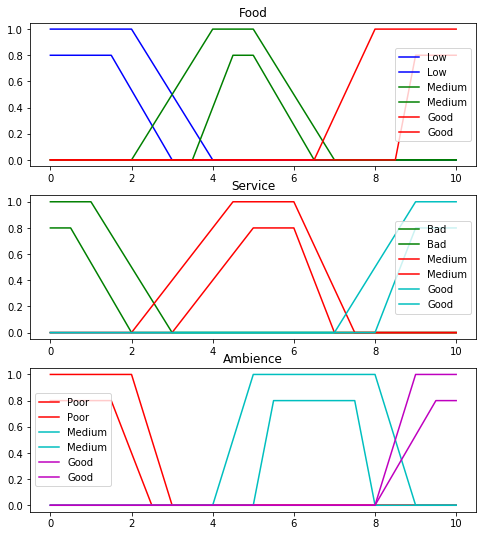

In [594]:
plots(j,k,l)

In [44]:
(m,n,o)=input_parameters(1)

Enter parameter 1:Linguistic Weights
Enter lower bound, upper bound for range of parameter Linguistic Weights:0 10.01


In [45]:
(p,q,r)=fuzzification(m,n,o)

Enter the number of liguistic values for parameter Linguistic Weights:3
Enter linguistic values 1 for parameter Linguistic Weights:Very Important
Enter linguistic values 2 for parameter Linguistic Weights:Important
Enter linguistic values 3 for parameter Linguistic Weights:Unimportant
Select a membership function from the given options for each linguistic value of each parameter
{1: 'trapmf', 2: 'trimf', 3: 'gaussmf'}
Enter your choice for UMF for linguistic value Very Important for parameter Linguistic Weights:1
Enter your choice for LMF for linguistic value Very Important for parameter Linguistic Weights:1
{1: 'trapmf', 2: 'trimf', 3: 'gaussmf'}
Enter your choice for UMF for linguistic value Important for parameter Linguistic Weights:1
Enter your choice for LMF for linguistic value Important for parameter Linguistic Weights:1
{1: 'trapmf', 2: 'trimf', 3: 'gaussmf'}
Enter your choice for UMF for linguistic value Unimportant for parameter Linguistic Weights:1
Enter your choice for LMF 

In [555]:
(s,t,w)=mem_func(p,q,r)

Enter values a,b,c and d of TRAPMF membership function for parameter Linguistic Weights and linguistic value Very Important for UMF:0 0 2 4
Enter values a,b,c,d and height of TRAPMF membership function for parameter Linguistic Weights and linguistic value Very Important for LMF:0 0 1.5 3 0.8
Enter values a,b,c and d of TRAPMF membership function for parameter Linguistic Weights and linguistic value Important for UMF:2 4 5 7
Enter values a,b,c,d and height of TRAPMF membership function for parameter Linguistic Weights and linguistic value Important for LMF:3.5 4.5 5 6.5 0.8
Enter values a,b,c and d of TRAPMF membership function for parameter Linguistic Weights and linguistic value Unimportant for UMF:6.5 8 10 10
Enter values a,b,c,d and height of TRAPMF membership function for parameter Linguistic Weights and linguistic value Unimportant for LMF:8.5 9 10 10 0.8


In [556]:
(u,v,x)=fuzz_values(s,t,w)

In [572]:
print(t)

1


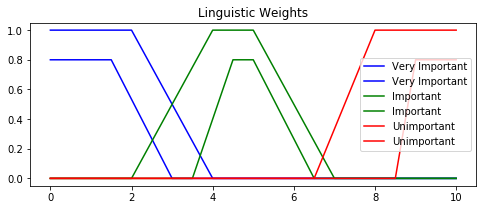

In [569]:
plots(u,1,x)

In [595]:
def expert_rules(input_ling_var):
    '''
    Inputs:
    input_ling_var = {'Food': {'Low': {'trapmf': [0.0, 0.0, 2.0, 4.0], 'trapLmf': [0.0, 0.0, 1.5, 3.0, 0.8]}, 
    'Medium': {'trapmf': [2.0, 4.0, 5.0, 7.0], 'trapLmf': [3.5, 4.5, 5.0, 6.5, 0.6]}, 
    'Good': {'trapmf': [6.5, 8.0, 10.0, 10.0], 'trapLmf': [8.5, 9.0, 10.0, 10.0, 0.8]}}, 
    'Service': {'Bad': {'trapmf': [0.0, 0.0, 1.0, 3.0], 'trapLmf': [0.0, 0.0, 0.5, 2.0, 0.6]}, 
    'Medium': {'trapmf': [2.0, 4.5, 6.0, 7.5], 'trapLmf': [3.0, 5.0, 6.0, 7.0, 0.8]}, 
    'Good': {'trapmf': [7.0, 9.0, 10.0, 10.0], 'trapLmf': [8.0, 9.0, 10.0, 10.0, 0.8]}}, 
    'Ambience': {'Poor': {'trapmf': [0.0, 0.0, 2.0, 3.0], 'trapLmf': [0.0, 0.0, 1.5, 2.5, 0.8]}, 
    'Medium': {'trapmf': [4.0, 5.0, 8.0, 9.0], 'trapLmf': [5.0, 5.5, 7.5, 8.0, 0.8]}, 
    'Good': {'trapmf': [8.0, 9.0, 10.0, 10.0], 'trapLmf': [8.0, 9.5, 10.0, 10.0, 0.6]}}}
    Outputs:
    {1: {'Food': {'Good': {'trapmf': [6.5, 8.0, 10.0, 10.0], 'trapLmf': [8.5, 9.0, 10.0, 10.0, 0.8]}}, 
    'Service': {'Good': {'trapmf': [7.0, 9.0, 10.0, 10.0], 'trapLmf': [8.0, 9.0, 10.0, 10.0, 0.8]}}, 
    'Ambience': {'Medium': {'trapmf': [4.0, 5.0, 8.0, 9.0], 'trapLmf': [5.0, 5.5, 7.5, 8.0, 0.8]}}}, 
    2: {'Food': {'Good': {'trapmf': [6.5, 8.0, 10.0, 10.0], 'trapLmf': [8.5, 9.0, 10.0, 10.0, 0.8]}}, 
    'Service': {'Medium': {'trapmf': [2.0, 4.5, 6.0, 7.5], 'trapLmf': [3.0, 5.0, 6.0, 7.0, 0.8]}}, 
    'Ambience': {'Medium': {'trapmf': [4.0, 5.0, 8.0, 9.0], 'trapLmf': [5.0, 5.5, 7.5, 8.0, 0.8]}}}, 
    3: {'Food': {'Low': {'trapmf': [0.0, 0.0, 2.0, 4.0], 'trapLmf': [0.0, 0.0, 1.5, 3.0, 0.8]}}, 
    'Service': {'Medium': {'trapmf': [2.0, 4.5, 6.0, 7.5], 'trapLmf': [3.0, 5.0, 6.0, 7.0, 0.8]}}, 
    'Ambience': {'Poor': {'trapmf': [0.0, 0.0, 2.0, 3.0], 'trapLmf': [0.0, 0.0, 1.5, 2.5, 0.8]}}}}
    '''
    no_resturants=int(input("Enter the number of resturants:"))
    mappings={}
    for i in input_ling_var.keys():
        mappings[i]={}
        count=1
        for j in input_ling_var[i].keys():
            mappings[i][count]=j
            count+=1
    rules={}
    for i in range(no_resturants):
        rules[i+1]={}
        for j in input_ling_var.keys():
            rules[i+1][j]={}
            print(f"{mappings[j]}")
            val=int(input(f"Enter your choice for linguistic value for resturant {i+1} and linguistic variable {j}:"))
            rules[i+1][j][mappings[j][val]]=input_ling_var[j][mappings[j][val]]
    return(rules)

In [600]:
a1=expert_rules(g)

Enter the number of resturants:3
{1: 'Low', 2: 'Medium', 3: 'Good'}
Enter your choice for linguistic value for resturant 1 and linguistic variable Food:3
{1: 'Bad', 2: 'Medium', 3: 'Good'}
Enter your choice for linguistic value for resturant 1 and linguistic variable Service:3
{1: 'Poor', 2: 'Medium', 3: 'Good'}
Enter your choice for linguistic value for resturant 1 and linguistic variable Ambience:3
{1: 'Low', 2: 'Medium', 3: 'Good'}
Enter your choice for linguistic value for resturant 2 and linguistic variable Food:3
{1: 'Bad', 2: 'Medium', 3: 'Good'}
Enter your choice for linguistic value for resturant 2 and linguistic variable Service:2
{1: 'Poor', 2: 'Medium', 3: 'Good'}
Enter your choice for linguistic value for resturant 2 and linguistic variable Ambience:2
{1: 'Low', 2: 'Medium', 3: 'Good'}
Enter your choice for linguistic value for resturant 3 and linguistic variable Food:1
{1: 'Bad', 2: 'Medium', 3: 'Good'}
Enter your choice for linguistic value for resturant 3 and linguistic

In [575]:
print(s)

{'Linguistic Weights': {'Very Important': {'trapmf': [0.0, 0.0, 2.0, 4.0], 'trapLmf': [0.0, 0.0, 1.5, 3.0, 0.8]}, 'Important': {'trapmf': [2.0, 4.0, 5.0, 7.0], 'trapLmf': [3.5, 4.5, 5.0, 6.5, 0.8]}, 'Unimportant': {'trapmf': [6.5, 8.0, 10.0, 10.0], 'trapLmf': [8.5, 9.0, 10.0, 10.0, 0.8]}}}


In [562]:
print(a1)

{1: {'Linguistic Weights': {'Very Important': [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.

In [559]:
def user_inputs(user_ling_var,input_ling_var):
    '''
    Inputs:
    user_ling_var = {'Linguistic Weights': {'Very Important': {'trapmf': [6.5, 8.0, 10.0, 10.0], 
    'trapLmf': [8.5, 9.0, 10.0, 10.0, 0.8]}, 'Important': {'trapmf': [2.0, 4.0, 5.0, 7.0], 
    'trapLmf': [3.5, 4.5, 5.0, 6.5, 0.6]}, 'Unimportant': {'trapmf': [0.0, 0.0, 2.0, 4.0], 
    'trapLmf': [0.0, 0.0, 1.5, 3.0, 0.8]}}}
    input_ling_var = {'Food': {'Low': {'trapmf': [0.0, 0.0, 2.0, 4.0], 
    'trapLmf': [0.0, 0.0, 1.5, 3.0, 0.8]}, 'Medium': {'trapmf': [2.0, 4.0, 5.0, 7.0], 
    'trapLmf': [3.5, 4.5, 5.0, 6.5, 0.6]}, 'Good': {'trapmf': [6.5, 8.0, 10.0, 10.0], 
    'trapLmf': [8.5, 9.0, 10.0, 10.0, 0.8]}}, 'Service': {'Bad': {'trapmf': [0.0, 0.0, 1.0, 3.0], 
    'trapLmf': [0.0, 0.0, 0.5, 2.0, 0.6]}, 'Medium': {'trapmf': [2.0, 4.5, 6.0, 7.5], 
    'trapLmf': [3.0, 5.0, 6.0, 7.0, 0.8]}, 'Good': {'trapmf': [7.0, 9.0, 10.0, 10.0], 
    'trapLmf': [8.0, 9.0, 10.0, 10.0, 0.8]}}, 'Ambience': {'Poor': {'trapmf': [0.0, 0.0, 2.0, 3.0], 
    'trapLmf': [0.0, 0.0, 1.5, 2.5, 0.8]}, 'Medium': {'trapmf': [4.0, 5.0, 8.0, 9.0], 
    'trapLmf': [5.0, 5.5, 7.5, 8.0, 0.8]}, 'Good': {'trapmf': [8.0, 9.0, 10.0, 10.0], 
    'trapLmf': [8.0, 9.5, 10.0, 10.0, 0.6]}}}
    Outputs:
    user_vocab = {'Food': {'Very Important': {'trapmf': [6.5, 8.0, 10.0, 10.0],'trapLmf': [8.5, 9.0, 10.0, 10.0, 0.8]}},
    'Service': {'Unimportant': {'trapmf': [0.0, 0.0, 2.0, 4.0],'trapLmf': [0.0, 0.0, 1.5, 3.0, 0.8]}},'Ambience': {'Important': {'trapmf': [2.0, 4.0, 5.0, 7.0],
   'trapLmf': [3.5, 4.5, 5.0, 6.5, 0.6]}}}
    '''
    mappings={}
    for i in user_ling_var.keys():
        count=1
        mappings[i]={}
        for j in user_ling_var[i].keys():
            mappings[i][count]=j
            count+=1
    user_vocab={}
    print(mappings)
    for i in user_ling_var.keys():
        for j in input_ling_var.keys():
            user_vocab[j]={}
            val=int(input(f"Enter your choice for linguistic value for user for linguistic variable {j}:"))
            user_vocab[j][mappings[i][val]]=user_ling_var[i][mappings[i][val]]
    return(user_vocab)

In [578]:
a2=user_inputs(s,g)

{'Linguistic Weights': {1: 'Very Important', 2: 'Important', 3: 'Unimportant'}}
Enter your choice for linguistic value for user for linguistic variable Food:1
Enter your choice for linguistic value for user for linguistic variable Service:3
Enter your choice for linguistic value for user for linguistic variable Ambience:2


In [579]:
print(a2)

{'Food': {'Very Important': {'trapmf': [0.0, 0.0, 2.0, 4.0], 'trapLmf': [0.0, 0.0, 1.5, 3.0, 0.8]}}, 'Service': {'Unimportant': {'trapmf': [6.5, 8.0, 10.0, 10.0], 'trapLmf': [8.5, 9.0, 10.0, 10.0, 0.8]}}, 'Ambience': {'Important': {'trapmf': [2.0, 4.0, 5.0, 7.0], 'trapLmf': [3.5, 4.5, 5.0, 6.5, 0.8]}}}


In [580]:
def plots1(rules,mem_func,no_resturants):
    '''
    Inputs:
    rules = {1: {'Food': {'Good': {'trapmf': [6.5, 8.0, 10.0, 10.0], 'trapLmf': [8.5, 9.0, 10.0, 10.0, 0.8]}}, 
    'Service': {'Good': {'trapmf': [7.0, 9.0, 10.0, 10.0], 'trapLmf': [8.0, 9.0, 10.0, 10.0, 0.8]}}, 
    'Ambience': {'Medium': {'trapmf': [4.0, 5.0, 8.0, 9.0], 'trapLmf': [5.0, 5.5, 7.5, 8.0, 0.8]}}}, 
    2: {'Food': {'Good': {'trapmf': [6.5, 8.0, 10.0, 10.0], 'trapLmf': [8.5, 9.0, 10.0, 10.0, 0.8]}}, 
    'Service': {'Medium': {'trapmf': [2.0, 4.5, 6.0, 7.5], 'trapLmf': [3.0, 5.0, 6.0, 7.0, 0.8]}}, 
    'Ambience': {'Medium': {'trapmf': [4.0, 5.0, 8.0, 9.0], 'trapLmf': [5.0, 5.5, 7.5, 8.0, 0.8]}}}, 
    3: {'Food': {'Low': {'trapmf': [0.0, 0.0, 2.0, 4.0], 'trapLmf': [0.0, 0.0, 1.5, 3.0, 0.8]}}, 
    'Service': {'Medium': {'trapmf': [2.0, 4.5, 6.0, 7.5], 'trapLmf': [3.0, 5.0, 6.0, 7.0, 0.8]}}, 
    'Ambience': {'Poor': {'trapmf': [0.0, 0.0, 2.0, 3.0], 'trapLmf': [0.0, 0.0, 1.5, 2.5, 0.8]}}}}
    mem_values = {'Food': {'Low': [array([1., 1., 1., ..., 0., 0., 0.]), array([0.8, 0.8, 0.8, ..., 0. , 0. , 0. ])],
    'Medium': [array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.])], 
    'Good': [array([0., 0., 0., ..., 1., 1., 1.]), array([0. , 0. , 0. , ..., 0.8, 0.8, 0.8])]}, 
    'Service': {'Bad': [array([1., 1., 1., ..., 0., 0., 0.]), array([0.6, 0.6, 0.6, ..., 0. , 0. , 0. ])], 
    'Medium': [array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.])], 
    'Good': [array([0., 0., 0., ..., 1., 1., 1.]), array([0. , 0. , 0. , ..., 0.8, 0.8, 0.8])]}, 
    'Ambience': {'Poor': [array([1., 1., 1., ..., 0., 0., 0.]), array([0.8, 0.8, 0.8, ..., 0. , 0. , 0. ])], 
    'Medium': [array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.])], 
    'Good': [array([0., 0., 0., ..., 1., 1., 1.]), array([0. , 0. , 0. , ..., 0.6, 0.6, 0.6])]}}
    no_resturants = 3
    '''
    #normalizing the scale from 0 to 10 and a step of 0.01
    a=np.arange(0,10.01,0.01)
    l=[]
    for i in range(no_resturants):
        l.append('ax'+str(i))
    l=tuple(l)
    fig,l=plt.subplots(nrows=no_resturants, figsize=(8, 3*no_resturants))
    count=0
    colours=['b','g','r','c','m','y','k']
    try:
        for i in rules.keys():
            m=0
            for j in rules[i].keys():
                for k in rules[i][j].keys():
                    l[count].plot(a,np.asarray(mem_func[j][k][0]),colours[(count+m)%7], linewidth=1.5, label=j)
                    l[count].plot(a,np.asarray(mem_func[j][k][1]),colours[(count+m)%7], linewidth=1.5, label=j)
                    m=m+1
            l[count].set_title('Resturant '+str(i))
            l[count].legend()
            count=count+1
    except:
        for i in rules.keys():
            m=0
            for j in rules[i].keys():
                for k in rules[i][j].keys():
                    l.plot(a,np.asarray(mem_func[j][k][0]),colours[(count+m)%7], linewidth=1.5, label=j)
                    l.plot(a,np.asarray(mem_func[j][k][1]),colours[(count+m)%7], linewidth=1.5, label=j)
                    m+=1
            l.set_title('Resturant '+str(i))
            l.legend()
            count=count+1
    #print(ranges,mem_func)

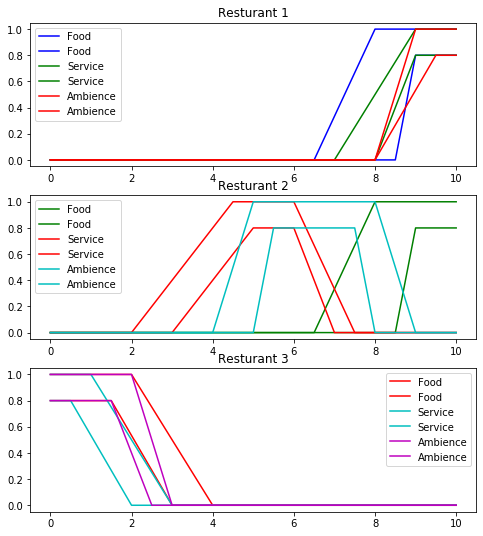

In [596]:
plots1(a1,j,3)

In [582]:
print(a1,j)

{1: {'Food': {'Good': {'trapmf': [6.5, 8.0, 10.0, 10.0, 1, 1, 1, 1], 'trapLmf': [8.5, 9.0, 10.0, 10.0, 0.8]}}, 'Service': {'Good': {'trapmf': [7.0, 9.0, 10.0, 10.0], 'trapLmf': [8.0, 9.0, 10.0, 10.0, 0.8]}}, 'Ambience': {'Good': {'trapmf': [8.0, 9.0, 10.0, 10.0], 'trapLmf': [8.0, 9.5, 10.0, 10.0, 0.6]}}}, 2: {'Food': {'Good': {'trapmf': [6.5, 8.0, 10.0, 10.0, 1, 1, 1, 1], 'trapLmf': [8.5, 9.0, 10.0, 10.0, 0.8]}}, 'Service': {'Medium': {'trapmf': [2.0, 4.5, 6.0, 7.5], 'trapLmf': [3.0, 5.0, 6.0, 7.0, 0.8]}}, 'Ambience': {'Medium': {'trapmf': [4.0, 5.0, 8.0, 9.0], 'trapLmf': [5.0, 5.5, 7.5, 8.0, 0.8]}}}, 3: {'Food': {'Low': {'trapmf': [0.0, 0.0, 2.0, 4.0], 'trapLmf': [0.0, 0.0, 1.5, 3.0, 0.8]}}, 'Service': {'Bad': {'trapmf': [0.0, 0.0, 1.0, 3.0], 'trapLmf': [0.0, 0.0, 0.5, 2.0, 0.6]}}, 'Ambience': {'Poor': {'trapmf': [0.0, 0.0, 2.0, 3.0], 'trapLmf': [0.0, 0.0, 1.5, 2.5, 0.8]}}}} {'Food': {'Low': [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.

In [157]:
def avg(x_lower,x_upper):
    #a supplementary function
    '''
    Inputs: Takes the two bounds of the range
    x_lower=2
    x_upper=9
    Outputs:
    (9+2)/2'''
    return (x_lower+x_upper)/2

In [376]:
def IWA(x_in,w_in):
    '''
    Inputs:
    x_in = [[7.0, 10.0]]
    w_in = [[0.0, 4.0]]
    Outputs:
    [4,6]
    '''
    
    #calculating y min
    
    #creating a dict of lower bounds in x_in
    a={}
    for i in range(len(x_in)):
        a[i]=x_in[i][0]
    
    #sorting the dictionary a in ascending order of values
    a=sorted(a.items(),key = lambda l:(l[1], l[0])) #a is now a list with key value pair as tuples
    
    #removing the keys from a
    new_a=[]
    for i in range(len(a)):
        new_a.append(a[i][1])
        
    #arranging w_in according to the sorted 'a'
    w_min=[]
    for i in range(len(a)):
        w_min.append(w_in[a[i][0]])
    
    #calculating average of the weighted intervals 'w_min'
    wmin_avg=[]
    for i in range(len(w_min)):
        wmin_avg.append(avg(w_min[i][0],w_min[i][1]))
    
    #calcualting the starting y min
    sum_wj=sum_wi=0
    for i in range(len(new_a)):
        sum_wj+=new_a[i]*wmin_avg[i]
        sum_wi+=wmin_avg[i]
    
    ymin_approx=sum_wj/sum_wi
    ymin_old=ymin_approx
    
    #iterations of KM Algorithm for ymin
    L=0
    while(True):
        
        #finding L* and L*+1
        for i in range(len(new_a)-1):
            if(ymin_old>=new_a[i] and ymin_old<=new_a[i+1]):
                L=new_a[i]
                break
        
        nsum_wj=nsum_wi=0
        for i in range(len(new_a)):
            if(new_a[i]<=L):
                nsum_wj+=new_a[i]*w_min[i][1]
                nsum_wi+=w_min[i][1]
            else:
                nsum_wj+=new_a[i]*w_min[i][0]
                nsum_wi+=w_min[i][0]
        
        #finding the new y min
        ymin_new=nsum_wj/nsum_wi
        
        if(ymin_new==ymin_old):
            break
        ymin_old=ymin_new
    
    #assinging the finally obtanied ymin_old
    
    ymin=ymin_old
    
    #calculating y max
    
    #creating a dictionary of upper bounds in x_in
    
    b={}
    for i in range(len(x_in)):
        b[i]=x_in[i][1]
    
    #sorting the dictionary b in ascending order of values
    b=sorted(b.items(),key = lambda l:(l[1], l[0])) #b is now a list with key value pair as tuples
    
    #removing the keys from b
    new_b=[]
    for i in range(len(b)):
        new_b.append(b[i][1])
    
    #arranging w_in according to the sorted 'b'
    w_max=[]
    for i in range(len(b)):
        w_max.append(w_in[b[i][0]])
    
    #calcualting the starting y max
    sum_wj_max=sum_wi_max=0
    for i in range(len(new_b)):
        sum_wj_max+=new_b[i]*wmin_avg[i]
        sum_wi_max+=wmin_avg[i]
    
    ymax_approx=sum_wj_max/sum_wi_max
    
    ymax_old=ymax_approx
    #iterations of KM Algorithm for ymax
    R=0
    while(True):
        
        #finding R* and R*+1
        for i in range(len(new_b)-1):
            if(ymax_old>=new_b[i] and ymax_old<=new_b[i+1]):
                R=new_b[i]
                break
                
        nsum_wj_max=nsum_wi_max=0
        
        for i in range(len(new_b)):
            if(new_b[i]<=R):
                nsum_wj_max+=new_b[i]*w_max[i][0]
                nsum_wi_max+=w_max[i][0]
            else:
                nsum_wj_max+=new_b[i]*w_max[i][1]
                nsum_wi_max+=w_max[i][1]
        
        #finding the new ymax
        ymax_new=nsum_wj_max/nsum_wi_max

        if(ymax_new==ymax_old):
            break
        
        ymax_old=ymax_new
        
    ymax=ymax_old
    
    return([ymin,ymax])
                

In [199]:
def trimf_intervals(peaks):
    '''
    Inputs:
    peaks:[0,0,5,0.8]
    Outputs:
    alpha_intervals = [[0, 5.0], [0, 4.69], [0, 4.38], [0, 4.06], [0, 3.75], [0, 3.44], 
    [0, 3.12], [0, 2.81], [0, 2.5], [0, 2.19], [0, 1.88], [0, 1.56], [0, 1.25], [0, 0.94], [0, 0.63], 
    [0, 0.31], [0, 0.0]]
    '''
    #making a list of x and y coordinates for each of the three points of the triangular function
    peaks_coord=[]
    for i in range(len(peaks)-1):
        if(i%2==0):
            peaks_coord.append((peaks[i],0))
        else:
            peaks_coord.append((peaks[i],peaks[-1]))
    #peaks_coord = [(0, 0), (0, 1), (5, 0)]
    #calculating slope for each of the two lines of the triangular function
    slopes=[]
    for i in range(len(peaks_coord)-1):
        den=peaks_coord[i][0]-peaks_coord[i+1][0]
        if den!=0 :
            slopes.append((peaks_coord[i][1]-peaks_coord[i+1][1])/den)
        else :
            slopes.append(float('inf'))
    #slopes = [inf, -0.2]
    alpha_intervals=[]
    for alpha in np.arange(0,peaks[-1]+0.05,0.05): #alpha goes from 0 to height h with an increment of 0.05
        l=[]
        alpha_r=round(alpha,2)
        for i in range(len(slopes)):
            if (slopes[i]!=float('inf')):
                l.append(round((alpha_r-peaks_coord[i][1])/slopes[i]+peaks_coord[i][0],2))
            else:
                l.append(peaks_coord[i][0])
        alpha_intervals.append(l)
    return(alpha_intervals)

In [250]:
def trapmf_intervals(peaks):
    '''
    Inputs:
    peaks=[0,0,5,7,0.8]
    Outputs:
    alpha_intervals=[[0.0, 7.0],[0.12, 6.88],[0.25, 6.75],[0.37, 6.62],[0.5, 6.5],[0.62, 6.38],[0.75, 6.25],
    [0.87, 6.12],[1.0, 6.0],[1.12, 5.88],[1.25, 5.75],[1.38, 5.62],[1.5, 5.5],[1.62, 5.38],[1.75, 5.25],[1.88, 5.12],[
    2.0, 5.0]]
    '''
    #making a list of x and y coordinates for each of the three points of the trapizoidal function
    peaks_coord=[]
    for i in range(len(peaks)-1):
        if(i==0 or i==3):
            peaks_coord.append((peaks[i],0))
        else:
            peaks_coord.append((peaks[i],peaks[-1]))
    
    #calculating slope for each of the two lines of the triangular function
    slopes=[]
    for i in range(len(peaks_coord)-1):
        den=peaks_coord[i][0]-peaks_coord[i+1][0]
        num=peaks_coord[i][1]-peaks_coord[i+1][1]
        if num==0:
            slopes.append(0)
        elif den!=0 :
            slopes.append(num/den)
        else :
            slopes.append(float('inf'))
    #print(slopes)
    #slopes = [inf, 0, -0.4]
    alpha_intervals=[]
    for alpha in np.arange(0,peaks[-1]+0.05,0.05): #alpha goes from 0 to height h with an increment of 0.05
        l=[]
        alpha_r=round(alpha,2)
        for i in range(len(slopes)):
            if (slopes[i]==0):
                continue
            elif (slopes[i]!=float('inf')):
                l.append(round((alpha_r-peaks_coord[i][1])/slopes[i]+peaks_coord[i][0],2))
            else:
                l.append(peaks_coord[i][0])
        alpha_intervals.append(l)
    return(alpha_intervals)
    

In [228]:
trapmf_intervals([0,2,5,7,0.8])

[0, 2, 5, 7, 0.8]


[[0.0, 7.0],
 [0.12, 6.88],
 [0.25, 6.75],
 [0.37, 6.62],
 [0.5, 6.5],
 [0.62, 6.38],
 [0.75, 6.25],
 [0.87, 6.12],
 [1.0, 6.0],
 [1.12, 5.88],
 [1.25, 5.75],
 [1.38, 5.62],
 [1.5, 5.5],
 [1.62, 5.38],
 [1.75, 5.25],
 [1.88, 5.12],
 [2.0, 5.0]]

In [258]:
def combination(rules,user_vocab):
    '''
    Inputs:
    rules = {1: {'Food': {'Good': {'trapmf': [6.5, 8.0, 10.0, 10.0], 'trapLmf': [8.5, 9.0, 10.0, 10.0, 0.8]}}, 
    'Service': {'Good': {'trapmf': [7.0, 9.0, 10.0, 10.0], 'trapLmf': [8.0, 9.0, 10.0, 10.0, 0.8]}}, 
    'Ambience': {'Medium': {'trapmf': [4.0, 5.0, 8.0, 9.0], 'trapLmf': [5.0, 5.5, 7.5, 8.0, 0.8]}}}, 
    2: {'Food': {'Good': {'trapmf': [6.5, 8.0, 10.0, 10.0], 'trapLmf': [8.5, 9.0, 10.0, 10.0, 0.8]}}, 
    'Service': {'Medium': {'trapmf': [2.0, 4.5, 6.0, 7.5], 'trapLmf': [3.0, 5.0, 6.0, 7.0, 0.8]}}, 
    'Ambience': {'Medium': {'trapmf': [4.0, 5.0, 8.0, 9.0], 'trapLmf': [5.0, 5.5, 7.5, 8.0, 0.8]}}}, 
    3: {'Food': {'Low': {'trapmf': [0.0, 0.0, 2.0, 4.0], 'trapLmf': [0.0, 0.0, 1.5, 3.0, 0.8]}}, 
    'Service': {'Medium': {'trapmf': [2.0, 4.5, 6.0, 7.5], 'trapLmf': [3.0, 5.0, 6.0, 7.0, 0.8]}}, 
    'Ambience': {'Poor': {'trapmf': [0.0, 0.0, 2.0, 3.0], 'trapLmf': [0.0, 0.0, 1.5, 2.5, 0.8]}}}}
    user_vocab = {'Food': {'Very Important': {'trapmf': [6.5, 8.0, 10.0, 10.0],'trapLmf': [8.5, 9.0, 10.0, 10.0, 0.8]}},
    'Service': {'Unimportant': {'trapmf': [0.0, 0.0, 2.0, 4.0],'trapLmf': [0.0, 0.0, 1.5, 3.0, 0.8]}},'Ambience': {'Important': {'trapmf': [2.0, 4.0, 5.0, 7.0],
   'trapLmf': [3.5, 4.5, 5.0, 6.5, 0.6]}}}
   Outputs:
   alpha_intervals_res_list = {1: {'Food': [[[6.5, 10.0], [6.58, 10.0], [6.65, 10.0], [6.72, 10.0], [6.8, 10.0],
   [6.88, 10.0], [6.95, 10.0], [7.02, 10.0], [7.1, 10.0], [7.18, 10.0], [7.25, 10.0], [7.32, 10.0], [7.4, 10.0], 
   [7.48, 10.0], [7.55, 10.0], [7.62, 10.0], [7.7, 10.0], [7.78, 10.0], [7.85, 10.0], [7.92, 10.0], [8.0, 10.0]], 
   [[8.5, 10.0], [8.53, 10.0], [8.56, 10.0], [8.59, 10.0], [8.62, 10.0], [8.66, 10.0], [8.69, 10.0], [8.72, 10.0], 
   [8.75, 10.0], [8.78, 10.0], [8.81, 10.0], [8.84, 10.0], [8.88, 10.0], [8.91, 10.0], [8.94, 10.0], [8.97, 10.0], 
   [9.0, 10.0]]], 'Service': [[[7.0, 10.0], [7.1, 10.0], [7.2, 10.0], [7.3, 10.0], [7.4, 10.0], [7.5, 10.0], 
   [7.6, 10.0], [7.7, 10.0], [7.8, 10.0], [7.9, 10.0], [8.0, 10.0], [8.1, 10.0], [8.2, 10.0], [8.3, 10.0], 
   [8.4, 10.0], [8.5, 10.0], [8.6, 10.0], [8.7, 10.0], [8.8, 10.0], [8.9, 10.0], [9.0, 10.0]], [[8.0, 10.0], 
   [8.06, 10.0], [8.12, 10.0], [8.19, 10.0], [8.25, 10.0], [8.31, 10.0], [8.38, 10.0], [8.44, 10.0], [8.5, 10.0], 
   [8.56, 10.0], [8.62, 10.0], [8.69, 10.0], [8.75, 10.0], [8.81, 10.0], [8.88, 10.0], [8.94, 10.0], [9.0, 10.0]]], 
   'Ambience': [[[4.0, 9.0], [4.05, 8.95], [4.1, 8.9], [4.15, 8.85], [4.2, 8.8], [4.25, 8.75], [4.3, 8.7], 
   [4.35, 8.65], [4.4, 8.6], [4.45, 8.55], [4.5, 8.5], [4.55, 8.45], [4.6, 8.4], [4.65, 8.35], [4.7, 8.3], 
   [4.75, 8.25], [4.8, 8.2], [4.85, 8.15], [4.9, 8.1], [4.95, 8.05], [5.0, 8.0]], [[5.0, 8.0], [5.03, 7.97], 
   [5.06, 7.94], [5.09, 7.91], [5.12, 7.88], [5.16, 7.84], [5.19, 7.81], [5.22, 7.78], [5.25, 7.75], [5.28, 7.72], 
   [5.31, 7.69], [5.34, 7.66], [5.38, 7.62], [5.41, 7.59], [5.44, 7.56], [5.47, 7.53], [5.5, 7.5]]]},
   alpha_intervals_user_list = {'Food': [[[6.5, 10.0], [6.58, 10.0], [6.65, 10.0], [6.72, 10.0], [6.8, 10.0], 
   [6.88, 10.0], [6.95, 10.0], [7.02, 10.0], [7.1, 10.0], [7.18, 10.0], [7.25, 10.0], [7.32, 10.0], 
   [7.4, 10.0], [7.48, 10.0], [7.55, 10.0], [7.62, 10.0], [7.7, 10.0], [7.78, 10.0], [7.85, 10.0], 
   [7.92, 10.0], [8.0, 10.0]], [[8.5, 10.0], [8.53, 10.0], [8.56, 10.0], [8.59, 10.0], [8.62, 10.0], 
   [8.66, 10.0], [8.69, 10.0], [8.72, 10.0], [8.75, 10.0], [8.78, 10.0], [8.81, 10.0], [8.84, 10.0], 
   [8.88, 10.0], [8.91, 10.0], [8.94, 10.0], [8.97, 10.0], [9.0, 10.0]]], 'Service': [[[0.0, 4.0], [0.0, 3.9], 
   [0.0, 3.8], [0.0, 3.7], [0.0, 3.6], [0.0, 3.5], [0.0, 3.4], [0.0, 3.3], [0.0, 3.2], [0.0, 3.1], [0.0, 3.0], 
   [0.0, 2.9], [0.0, 2.8], [0.0, 2.7], [0.0, 2.6], [0.0, 2.5], [0.0, 2.4], [0.0, 2.3], [0.0, 2.2], [0.0, 2.1], 
   [0.0, 2.0]], [[0.0, 3.0], [0.0, 2.91], [0.0, 2.81], [0.0, 2.72], [0.0, 2.62], [0.0, 2.53], [0.0, 2.44], 
   [0.0, 2.34], [0.0, 2.25], [0.0, 2.16], [0.0, 2.06], [0.0, 1.97], [0.0, 1.88], [0.0, 1.78], [0.0, 1.69], 
   [0.0, 1.59], [0.0, 1.5]]], 'Ambience': [[[2.0, 7.0], [2.1, 6.9], [2.2, 6.8], [2.3, 6.7], [2.4, 6.6], [2.5, 6.5], 
   [2.6, 6.4], [2.7, 6.3], [2.8, 6.2], [2.9, 6.1], [3.0, 6.0], [3.1, 5.9], [3.2, 5.8], [3.3, 5.7], [3.4, 5.6], 
   [3.5, 5.5], [3.6, 5.4], [3.7, 5.3], [3.8, 5.2], [3.9, 5.1], [4.0, 5.0]], [[3.5, 6.5], [3.58, 6.38], [3.67, 6.25], 
   [3.75, 6.12], [3.83, 6.0], [3.92, 5.88], [4.0, 5.75], [4.08, 5.62], [4.17, 5.5], [4.25, 5.38], [4.33, 5.25], 
   [4.42, 5.12], [4.5, 5.0]]]}
    '''
    #Gauss function is skipped
    alpha_intervals_res_list={}
    for i in rules.keys():
        alpha_intervals_res_list[i]={}
        for j in rules[i].keys():
            alpha_intervals_res_list[i][j]=[]
            for k in rules[i][j].keys():
                for l in rules[i][j][k].keys():
                    if(l=='trapmf'):
                        alpha_intervals_res_list[i][j].append(trapmf_intervals(rules[i][j][k][l]+[1]))
                    elif(l=='trapLmf'):
                        alpha_intervals_res_list[i][j].append(trapmf_intervals(rules[i][j][k][l]))
                    elif(l=='trimf'):
                        alpha_intervals_res_list[i][j].append(trimf_intervals(rules[i][j][k][l]+[1]))
                    else:
                        alpha_intervals_res_list[i][j].append(trimf_intervals(rules[i][j][k][l]))
    #print(alpha_intervals_res_list)

    alpha_intervals_user_list={}
    for i in user_vocab.keys():
        alpha_intervals_user_list[i]=[]
        for j in user_vocab[i].keys():
            for k in user_vocab[i][j].keys():
                if(k=='trapmf'):
                    alpha_intervals_user_list[i].append(trapmf_intervals(user_vocab[i][j][k]+[1]))
                elif(k=='trapLmf'):
                    alpha_intervals_user_list[i].append(trapmf_intervals(user_vocab[i][j][k]))
                elif(k=='trimf'):
                    alpha_intervals_user_list[i].append(trimf_intervals(user_vocab[i][j][k]+[1]))
                else:
                    alpha_intervals_user_list[i].append(trimf_intervals(user_vocab[i][j][k]))
    #print(alpha_intervals_user_list)
    return(alpha_intervals_res_list,alpha_intervals_user_list)
            

In [374]:
def preprocessing_KM(alpha_intervals_res_list,alpha_intervals_user_list):
    '''
    Inputs:
    alpha_intervals_res_lis = {1: {'Food': [[[6.5, 10.0], [6.58, 10.0], [6.65, 10.0], [6.72, 10.0], [6.8, 10.0],
   [6.88, 10.0], [6.95, 10.0], [7.02, 10.0], [7.1, 10.0], [7.18, 10.0], [7.25, 10.0], [7.32, 10.0], [7.4, 10.0], 
   [7.48, 10.0], [7.55, 10.0], [7.62, 10.0], [7.7, 10.0], [7.78, 10.0], [7.85, 10.0], [7.92, 10.0], [8.0, 10.0]], 
   [[8.5, 10.0], [8.53, 10.0], [8.56, 10.0], [8.59, 10.0], [8.62, 10.0], [8.66, 10.0], [8.69, 10.0], [8.72, 10.0], 
   [8.75, 10.0], [8.78, 10.0], [8.81, 10.0], [8.84, 10.0], [8.88, 10.0], [8.91, 10.0], [8.94, 10.0], [8.97, 10.0], 
   [9.0, 10.0]]], 'Service': [[[7.0, 10.0], [7.1, 10.0], [7.2, 10.0], [7.3, 10.0], [7.4, 10.0], [7.5, 10.0], 
   [7.6, 10.0], [7.7, 10.0], [7.8, 10.0], [7.9, 10.0], [8.0, 10.0], [8.1, 10.0], [8.2, 10.0], [8.3, 10.0], 
   [8.4, 10.0], [8.5, 10.0], [8.6, 10.0], [8.7, 10.0], [8.8, 10.0], [8.9, 10.0], [9.0, 10.0]], [[8.0, 10.0], 
   [8.06, 10.0], [8.12, 10.0], [8.19, 10.0], [8.25, 10.0], [8.31, 10.0], [8.38, 10.0], [8.44, 10.0], [8.5, 10.0], 
   [8.56, 10.0], [8.62, 10.0], [8.69, 10.0], [8.75, 10.0], [8.81, 10.0], [8.88, 10.0], [8.94, 10.0], [9.0, 10.0]]], 
   'Ambience': [[[4.0, 9.0], [4.05, 8.95], [4.1, 8.9], [4.15, 8.85], [4.2, 8.8], [4.25, 8.75], [4.3, 8.7], 
   [4.35, 8.65], [4.4, 8.6], [4.45, 8.55], [4.5, 8.5], [4.55, 8.45], [4.6, 8.4], [4.65, 8.35], [4.7, 8.3], 
   [4.75, 8.25], [4.8, 8.2], [4.85, 8.15], [4.9, 8.1], [4.95, 8.05], [5.0, 8.0]], [[5.0, 8.0], [5.03, 7.97], 
   [5.06, 7.94], [5.09, 7.91], [5.12, 7.88], [5.16, 7.84], [5.19, 7.81], [5.22, 7.78], [5.25, 7.75], [5.28, 7.72], 
   [5.31, 7.69], [5.34, 7.66], [5.38, 7.62], [5.41, 7.59], [5.44, 7.56], [5.47, 7.53], [5.5, 7.5]]]},
   alpha_intervals_user_list = {'Food': [[[6.5, 10.0], [6.58, 10.0], [6.65, 10.0], [6.72, 10.0], [6.8, 10.0], 
   [6.88, 10.0], [6.95, 10.0], [7.02, 10.0], [7.1, 10.0], [7.18, 10.0], [7.25, 10.0], [7.32, 10.0], 
   [7.4, 10.0], [7.48, 10.0], [7.55, 10.0], [7.62, 10.0], [7.7, 10.0], [7.78, 10.0], [7.85, 10.0], 
   [7.92, 10.0], [8.0, 10.0]], [[8.5, 10.0], [8.53, 10.0], [8.56, 10.0], [8.59, 10.0], [8.62, 10.0], 
   [8.66, 10.0], [8.69, 10.0], [8.72, 10.0], [8.75, 10.0], [8.78, 10.0], [8.81, 10.0], [8.84, 10.0], 
   [8.88, 10.0], [8.91, 10.0], [8.94, 10.0], [8.97, 10.0], [9.0, 10.0]]], 'Service': [[[0.0, 4.0], [0.0, 3.9], 
   [0.0, 3.8], [0.0, 3.7], [0.0, 3.6], [0.0, 3.5], [0.0, 3.4], [0.0, 3.3], [0.0, 3.2], [0.0, 3.1], [0.0, 3.0], 
   [0.0, 2.9], [0.0, 2.8], [0.0, 2.7], [0.0, 2.6], [0.0, 2.5], [0.0, 2.4], [0.0, 2.3], [0.0, 2.2], [0.0, 2.1], 
   [0.0, 2.0]], [[0.0, 3.0], [0.0, 2.91], [0.0, 2.81], [0.0, 2.72], [0.0, 2.62], [0.0, 2.53], [0.0, 2.44], 
   [0.0, 2.34], [0.0, 2.25], [0.0, 2.16], [0.0, 2.06], [0.0, 1.97], [0.0, 1.88], [0.0, 1.78], [0.0, 1.69], 
   [0.0, 1.59], [0.0, 1.5]]], 'Ambience': [[[2.0, 7.0], [2.1, 6.9], [2.2, 6.8], [2.3, 6.7], [2.4, 6.6], [2.5, 6.5], 
   [2.6, 6.4], [2.7, 6.3], [2.8, 6.2], [2.9, 6.1], [3.0, 6.0], [3.1, 5.9], [3.2, 5.8], [3.3, 5.7], [3.4, 5.6], 
   [3.5, 5.5], [3.6, 5.4], [3.7, 5.3], [3.8, 5.2], [3.9, 5.1], [4.0, 5.0]], [[3.5, 6.5], [3.58, 6.38], [3.67, 6.25], 
   [3.75, 6.12], [3.83, 6.0], [3.92, 5.88], [4.0, 5.75], [4.08, 5.62], [4.17, 5.5], [4.25, 5.38], [4.33, 5.25], 
   [4.42, 5.12], [4.5, 5.0]]]}
   Ouptus:
   alpha_intervals_res_list = {1: {'Food': [[[6.5, 10.0], [6.58, 10.0], [6.65, 10.0], [6.72, 10.0], 
    [6.8, 10.0], [6.88, 10.0], [6.95, 10.0], [7.02, 10.0], [7.1, 10.0], [7.18, 10.0], [7.25, 10.0], 
    [7.32, 10.0], [7.4, 10.0], [7.48, 10.0], [7.55, 10.0], [7.62, 10.0], [7.7, 10.0], [7.78, 10.0], 
    [7.85, 10.0], [7.92, 10.0], [8.0, 10.0]], [[8.5, 10.0], [8.53, 10.0], [8.56, 10.0], [8.59, 10.0], 
    [8.62, 10.0], [8.66, 10.0], [8.69, 10.0], [8.72, 10.0], [8.75, 10.0], [8.78, 10.0], [8.81, 10.0], 
    [8.84, 10.0], [8.88, 10.0], [8.91, 10.0], [8.94, 10.0], [8.97, 10.0], [9.0, 10.0]]], 
    'Service': [[[7.0, 10.0], [7.1, 10.0], [7.2, 10.0], [7.3, 10.0], [7.4, 10.0], [7.5, 10.0], 
    [7.6, 10.0], [7.7, 10.0], [7.8, 10.0], [7.9, 10.0], [8.0, 10.0], [8.1, 10.0], [8.2, 10.0], [8.3, 10.0], 
    [8.4, 10.0], [8.5, 10.0], [8.6, 10.0], [8.7, 10.0], [8.8, 10.0], [8.9, 10.0], [9.0, 10.0]], [[8.0, 10.0], 
    [8.06, 10.0], [8.12, 10.0], [8.19, 10.0], [8.25, 10.0], [8.31, 10.0], [8.38, 10.0], [8.44, 10.0], [8.5, 10.0], 
    [8.56, 10.0], [8.62, 10.0], [8.69, 10.0], [8.75, 10.0], [8.81, 10.0], [8.88, 10.0], [8.94, 10.0], [9.0, 10.0]]], 
    'Ambience': [[[4.0, 9.0], [4.05, 8.95], [4.1, 8.9], [4.15, 8.85], [4.2, 8.8], [4.25, 8.75], [4.3, 8.7], 
    [4.35, 8.65], [4.4, 8.6], [4.45, 8.55], [4.5, 8.5], [4.55, 8.45], [4.6, 8.4], [4.65, 8.35], [4.7, 8.3], 
    [4.75, 8.25], [4.8, 8.2], [4.85, 8.15], [4.9, 8.1], [4.95, 8.05], [5.0, 8.0]], [[5.0, 8.0], [5.03, 7.97], 
    [5.06, 7.94], [5.09, 7.91], [5.12, 7.88], [5.16, 7.84], [5.19, 7.81], [5.22, 7.78], [5.25, 7.75], [5.28, 7.72], 
    [5.31, 7.69], [5.34, 7.66], [5.38, 7.62]]]},
    alpha_pruned_intervals_user_list = {1: {'Food': [[[6.5, 10.0], [6.58, 10.0], [6.65, 10.0], [6.72, 10.0], 
    [6.8, 10.0], [6.88, 10.0], [6.95, 10.0], [7.02, 10.0], [7.1, 10.0], [7.18, 10.0], [7.25, 10.0], [7.32, 10.0], 
    [7.4, 10.0], [7.48, 10.0], [7.55, 10.0], [7.62, 10.0], [7.7, 10.0], [7.78, 10.0], [7.85, 10.0], [7.92, 10.0], 
    [8.0, 10.0]], [[8.5, 10.0], [8.53, 10.0], [8.56, 10.0], [8.59, 10.0], [8.62, 10.0], [8.66, 10.0], [8.69, 10.0], 
    [8.72, 10.0], [8.75, 10.0], [8.78, 10.0], [8.81, 10.0], [8.84, 10.0], [8.88, 10.0], [8.91, 10.0], [8.94, 10.0], 
    [8.97, 10.0], [9.0, 10.0]]], 'Service': [[[0.0, 4.0], [0.0, 3.9], [0.0, 3.8], [0.0, 3.7], [0.0, 3.6], [0.0, 3.5], 
    [0.0, 3.4], [0.0, 3.3], [0.0, 3.2], [0.0, 3.1], [0.0, 3.0], [0.0, 2.9], [0.0, 2.8], [0.0, 2.7], [0.0, 2.6], 
    [0.0, 2.5], [0.0, 2.4], [0.0, 2.3], [0.0, 2.2], [0.0, 2.1], [0.0, 2.0]], [[0.0, 3.0], [0.0, 2.91], [0.0, 2.81],
    [0.0, 2.72], [0.0, 2.62], [0.0, 2.53], [0.0, 2.44], [0.0, 2.34], [0.0, 2.25], [0.0, 2.16], [0.0, 2.06], 
    [0.0, 1.97], [0.0, 1.88], [0.0, 1.78], [0.0, 1.69], [0.0, 1.59], [0.0, 1.5]]], 'Ambience': [[[2.0, 7.0], 
    [2.1, 6.9], [2.2, 6.8], [2.3, 6.7], [2.4, 6.6], [2.5, 6.5], [2.6, 6.4], [2.7, 6.3], [2.8, 6.2], [2.9, 6.1], 
    [3.0, 6.0], [3.1, 5.9], [3.2, 5.8], [3.3, 5.7], [3.4, 5.6], [3.5, 5.5], [3.6, 5.4], [3.7, 5.3], [3.8, 5.2], 
    [3.9, 5.1], [4.0, 5.0]], [[3.5, 6.5], [3.58, 6.38], [3.67, 6.25], [3.75, 6.12], [3.83, 6.0], [3.92, 5.88], 
    [4.0, 5.75], [4.08, 5.62], [4.17, 5.5], [4.25, 5.38], [4.33, 5.25], [4.42, 5.12], [4.5, 5.0]]]},
   '''
    #pruning the lists for equal number of intervals in linguistic variable for each resturant for the corresponding weights
    alpha_pruned_intervals_user_list={}
    for i in alpha_intervals_res_list.keys():
        alpha_pruned_intervals_user_list[i]={}
        for j in alpha_intervals_res_list[i].keys():
            alpha_pruned_intervals_user_list[i][j]=[]
            for k in range(len(alpha_intervals_res_list[i][j])):
                if len(alpha_intervals_res_list[i][j][k])>len(alpha_intervals_user_list[j][k]):
                    alpha_intervals_res_list[i][j][k] = alpha_intervals_res_list[i][j][k][:len(alpha_intervals_user_list[j][k])]
                    alpha_pruned_intervals_user_list[i][j].append(alpha_intervals_user_list[j][k])
                elif len(alpha_intervals_res_list[i][j][k])<len(alpha_intervals_user_list[j][k]):
                    alpha_pruned_intervals_user_list[i][j].append(alpha_intervals_user_list[j][k][:len(alpha_intervals_res_list[i][j][k])])
                else:
                    alpha_pruned_intervals_user_list[i][j].append(alpha_intervals_user_list[j][k])
    return(alpha_intervals_res_list,alpha_pruned_intervals_user_list)

In [614]:
def implementing_KM(alpha_intervals_res_list,alpha_pruned_intervals_user_list):
    '''
    Inputs:
    alpha_intervals_res_list = {1: {'Food': [[[6.5, 10.0], [6.58, 10.0], [6.65, 10.0], [6.72, 10.0], 
    [6.8, 10.0], [6.88, 10.0], [6.95, 10.0], [7.02, 10.0], [7.1, 10.0], [7.18, 10.0], [7.25, 10.0], 
    [7.32, 10.0], [7.4, 10.0], [7.48, 10.0], [7.55, 10.0], [7.62, 10.0], [7.7, 10.0], [7.78, 10.0], 
    [7.85, 10.0], [7.92, 10.0], [8.0, 10.0]], [[8.5, 10.0], [8.53, 10.0], [8.56, 10.0], [8.59, 10.0], 
    [8.62, 10.0], [8.66, 10.0], [8.69, 10.0], [8.72, 10.0], [8.75, 10.0], [8.78, 10.0], [8.81, 10.0], 
    [8.84, 10.0], [8.88, 10.0], [8.91, 10.0], [8.94, 10.0], [8.97, 10.0], [9.0, 10.0]]], 
    'Service': [[[7.0, 10.0], [7.1, 10.0], [7.2, 10.0], [7.3, 10.0], [7.4, 10.0], [7.5, 10.0], 
    [7.6, 10.0], [7.7, 10.0], [7.8, 10.0], [7.9, 10.0], [8.0, 10.0], [8.1, 10.0], [8.2, 10.0], [8.3, 10.0], 
    [8.4, 10.0], [8.5, 10.0], [8.6, 10.0], [8.7, 10.0], [8.8, 10.0], [8.9, 10.0], [9.0, 10.0]], [[8.0, 10.0], 
    [8.06, 10.0], [8.12, 10.0], [8.19, 10.0], [8.25, 10.0], [8.31, 10.0], [8.38, 10.0], [8.44, 10.0], [8.5, 10.0], 
    [8.56, 10.0], [8.62, 10.0], [8.69, 10.0], [8.75, 10.0], [8.81, 10.0], [8.88, 10.0], [8.94, 10.0], [9.0, 10.0]]], 
    'Ambience': [[[4.0, 9.0], [4.05, 8.95], [4.1, 8.9], [4.15, 8.85], [4.2, 8.8], [4.25, 8.75], [4.3, 8.7], 
    [4.35, 8.65], [4.4, 8.6], [4.45, 8.55], [4.5, 8.5], [4.55, 8.45], [4.6, 8.4], [4.65, 8.35], [4.7, 8.3], 
    [4.75, 8.25], [4.8, 8.2], [4.85, 8.15], [4.9, 8.1], [4.95, 8.05], [5.0, 8.0]], [[5.0, 8.0], [5.03, 7.97], 
    [5.06, 7.94], [5.09, 7.91], [5.12, 7.88], [5.16, 7.84], [5.19, 7.81], [5.22, 7.78], [5.25, 7.75], [5.28, 7.72], 
    [5.31, 7.69], [5.34, 7.66], [5.38, 7.62]]]},
    alpha_pruned_intervals_user_list = {1: {'Food': [[[6.5, 10.0], [6.58, 10.0], [6.65, 10.0], [6.72, 10.0], 
    [6.8, 10.0], [6.88, 10.0], [6.95, 10.0], [7.02, 10.0], [7.1, 10.0], [7.18, 10.0], [7.25, 10.0], [7.32, 10.0], 
    [7.4, 10.0], [7.48, 10.0], [7.55, 10.0], [7.62, 10.0], [7.7, 10.0], [7.78, 10.0], [7.85, 10.0], [7.92, 10.0], 
    [8.0, 10.0]], [[8.5, 10.0], [8.53, 10.0], [8.56, 10.0], [8.59, 10.0], [8.62, 10.0], [8.66, 10.0], [8.69, 10.0], 
    [8.72, 10.0], [8.75, 10.0], [8.78, 10.0], [8.81, 10.0], [8.84, 10.0], [8.88, 10.0], [8.91, 10.0], [8.94, 10.0], 
    [8.97, 10.0], [9.0, 10.0]]], 'Service': [[[0.0, 4.0], [0.0, 3.9], [0.0, 3.8], [0.0, 3.7], [0.0, 3.6], [0.0, 3.5], 
    [0.0, 3.4], [0.0, 3.3], [0.0, 3.2], [0.0, 3.1], [0.0, 3.0], [0.0, 2.9], [0.0, 2.8], [0.0, 2.7], [0.0, 2.6], 
    [0.0, 2.5], [0.0, 2.4], [0.0, 2.3], [0.0, 2.2], [0.0, 2.1], [0.0, 2.0]], [[0.0, 3.0], [0.0, 2.91], [0.0, 2.81],
    [0.0, 2.72], [0.0, 2.62], [0.0, 2.53], [0.0, 2.44], [0.0, 2.34], [0.0, 2.25], [0.0, 2.16], [0.0, 2.06], 
    [0.0, 1.97], [0.0, 1.88], [0.0, 1.78], [0.0, 1.69], [0.0, 1.59], [0.0, 1.5]]], 'Ambience': [[[2.0, 7.0], 
    [2.1, 6.9], [2.2, 6.8], [2.3, 6.7], [2.4, 6.6], [2.5, 6.5], [2.6, 6.4], [2.7, 6.3], [2.8, 6.2], [2.9, 6.1], 
    [3.0, 6.0], [3.1, 5.9], [3.2, 5.8], [3.3, 5.7], [3.4, 5.6], [3.5, 5.5], [3.6, 5.4], [3.7, 5.3], [3.8, 5.2], 
    [3.9, 5.1], [4.0, 5.0]], [[3.5, 6.5], [3.58, 6.38], [3.67, 6.25], [3.75, 6.12], [3.83, 6.0], [3.92, 5.88], 
    [4.0, 5.75], [4.08, 5.62], [4.17, 5.5], [4.25, 5.38], [4.33, 5.25], [4.42, 5.12], [4.5, 5.0]]]},
    Outputs:
    
    '''
    a = np.around(np.arange(0,1.05,0.05),2)
    KM_res_list={}
    KM_user_list={}
    for i in alpha_intervals_res_list.keys():
        KM_res_list[i]={}
        KM_user_list[i]={}
        for k in range(len(a)):
            KM_res_list[i][a[k]]={}
            KM_user_list[i][a[k]]={}
            for l in range(0,2):
                KM_res_list[i][a[k]][l]=[]
                KM_user_list[i][a[k]][l]=[]
            for j in alpha_intervals_res_list[i].keys():
                    for l in range(0,2):
                        try:
                            #print(alpha_intervals_res_list[i][j][l][k])
                            KM_res_list[i][a[k]][l].append(alpha_intervals_res_list[i][j][l][k])
                            KM_user_list[i][a[k]][l].append(alpha_pruned_intervals_user_list[i][j][l][k])
                        except:
                            continue
    #print(KM_user_list)
    '''
    KM_res_list={1: {0.0: {0: [[6.5, 10.0], [7.0, 10.0], [4.0, 9.0]], 1: [[8.5, 10.0], [8.0, 10.0], [5.0, 8.0]]}, 
    0.05: {0: [[6.58, 10.0], [7.1, 10.0], [4.05, 8.95]], 1: [[8.53, 10.0], [8.06, 10.0], [5.03, 7.97]]}, 
    0.1: {0: [[6.65, 10.0], [7.2, 10.0], [4.1, 8.9]], 1: [[8.56, 10.0], [8.12, 10.0], [5.06, 7.94]]}, 
    0.15: {0: [[6.72, 10.0], [7.3, 10.0], [4.15, 8.85]], 1: [[8.59, 10.0], [8.19, 10.0], [5.09, 7.91]]}, 
    0.2: {0: [[6.8, 10.0], [7.4, 10.0], [4.2, 8.8]], 1: [[8.62, 10.0], [8.25, 10.0], [5.12, 7.88]]}, 
    0.25: {0: [[6.88, 10.0], [7.5, 10.0], [4.25, 8.75]], 1: [[8.66, 10.0], [8.31, 10.0], [5.16, 7.84]]}, 
    0.3: {0: [[6.95, 10.0], [7.6, 10.0], [4.3, 8.7]], 1: [[8.69, 10.0], [8.38, 10.0], [5.19, 7.81]]}, 
    0.35: {0: [[7.02, 10.0], [7.7, 10.0], [4.35, 8.65]], 1: [[8.72, 10.0], [8.44, 10.0], [5.22, 7.78]]}, 
    0.4: {0: [[7.1, 10.0], [7.8, 10.0], [4.4, 8.6]], 1: [[8.75, 10.0], [8.5, 10.0], [5.25, 7.75]]}, 
    0.45: {0: [[7.18, 10.0], [7.9, 10.0], [4.45, 8.55]], 1: [[8.78, 10.0], [8.56, 10.0], [5.28, 7.72]]}, 
    0.5: {0: [[7.25, 10.0], [8.0, 10.0], [4.5, 8.5]], 1: [[8.81, 10.0], [8.62, 10.0], [5.31, 7.69]]}, 
    0.55: {0: [[7.32, 10.0], [8.1, 10.0], [4.55, 8.45]], 1: [[8.84, 10.0], [8.69, 10.0], [5.34, 7.66]]}, 
    0.6: {0: [[7.4, 10.0], [8.2, 10.0], [4.6, 8.4]], 1: [[8.88, 10.0], [8.75, 10.0]
    '''
    
    KM_IWA={}
    for i in KM_res_list.keys():
        KM_IWA[i]={}
        for j in KM_res_list[i].keys():
            KM_IWA[i][j]=[]
            for k in KM_res_list[i][j].keys():
                if(KM_res_list[i][j][k]==[] or KM_user_list[i][j][k]==[]):
                    continue
                KM_IWA[i][j].append(IWA(KM_res_list[i][j][k],KM_user_list[i][j][k]))
            
                    
    #print(KM_IWA)
    '''
    KM_IWA={1: {0.0: [[5.203703703703703, 9.875], [6.983333333333333, 9.575757575757576]], 
    0.05: [[5.284970326409495, 9.862187500000001], [7.032347417840374, 9.559284414796846]], 
    0.1: [[5.360780669144981, 9.848749999999999], [7.082957461174882, 9.54125]], 
    0.15: [[5.436915052160954, 9.8346875], [7.133847722637661, 9.524134790528235]], 
    0.2: [[5.519402985074627, 9.82], [7.183611491108071, 9.506407294832828]], 
    0.25: [[5.602346786248131, 9.8046875], [7.2445942228335625, 9.485276595744681]], 
    0.3: [[5.679588014981273, 9.78875], [7.296301939058171, 9.467153284671532]], 
    0.35: [[5.757162162162161, 9.772187500000001], [7.348312412831242, 9.448380024360535]], 
    0.4: [[5.841353383458646, 9.754999999999999], [7.399122807017544, 9.428593179049939]], 
    0.45: [[5.9260090361445785, 9.737187500000001], [7.450197740112994, 9.409506398537477]], 
    0.5: [[6.004716981132075, 9.71875], [7.5031009957325745, 9.38973154362416]],
    0.55: [[6.083767019667171, 9.6996875], [7.5563323782234955, 9.36895668090299]], 
    0.6: [[6.16969696969697, 9.68], [7.619193083573487, 9.346153846153845]], 
    0.65: [[6.256100151745069, 9.6596875], [8.89334892422825, 10.0]], 
    0.7: [[6.336311787072243, 9.63875], [8.930460959548448, 10.0]], 
    0.75: [[6.416875, 9.6171875], [8.965482954545456, 10.0]], 
    0.8: [[6.504580152671756, 9.595], [9.0, 10.0]], 0.85: [[6.592767584097859, 9.5721875]], 
    0.9: [[6.674521072796934, 9.54875]], 0.95: [[6.75663594470046, 9.524687
    '''
    for i in KM_IWA.keys():
        for j in KM_IWA[i].keys():
            for k in range(len(KM_IWA[i][j])):
                for l in range(len(KM_IWA[i][j][k])):
                    KM_IWA[i][j][k][l]=round(KM_IWA[i][j][k][l],2)
    #print(KM_IWA)
    
    lower_bounds={}
    upper_bounds={}
    for i in KM_IWA.keys():
        lower_bounds[i]={}
        upper_bounds[i]={}
        for l in range(0,2):
            lower_bounds[i][l]=[]
            upper_bounds[i][l]=[]
        for j in KM_IWA[i].keys():
            for k in range(len(KM_IWA[i][j])):
                lower_bounds[i][k].append(KM_IWA[i][j][k][0])
                upper_bounds[i][k].append(KM_IWA[i][j][k][1])
    
    #print(lower_bounds)
    '''
    lower_bounds = {1: {0: [5.2, 5.28, 5.36, 5.44, 5.52, 5.6, 5.68, 5.76, 5.84, 5.93, 6.0, 6.08, 
    6.17, 6.26, 6.34, 6.42, 6.5, 6.59, 6.67, 6.76, 6.85], 1: [6.98, 7.03, 7.08, 7.13, 7.18, 7.24, 
    7.3, 7.35, 7.4, 7.45, 7.5, 7.56, 7.62, 8.89, 8.93, 8.97, 9.0]}, 2: {0: [4.47, 4.57, 4.68, 4.78, 4.88, 
    4.98, 5.08, 5.19, 5.29, 5.39, 5.5, 5.6, 5.7, 5.81, 5.91, 6.01, 6.12, 6.22, 6.32, 6.43, 6.53], 
    1: [6.32, 6.39, 6.47, 6.55, 6.62, 6.71, 6.78, 6.86, 6.94, 7.01, 7.09, 7.16, 7.25, 8.2, 8.27, 8.35, 8.43]}, 
    3: {0: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    1: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}}
    '''
    a1=list(KM_IWA.keys())
    l=[]
    for i in a1:
        l.append('ax'+str(i))
    l=tuple(l)
    fig,l=plt.subplots(nrows=len(a1), figsize=(8, 3*len(a1)))
    count=0
    colours=['b','g','r','c','m','y','k']
    for i in KM_IWA.keys():
        for j in lower_bounds[i].keys():
            f=''
            if(j==0):
                f='UMF'
            else:
                f='LMF'
            l[i-1].plot(np.asarray(lower_bounds[i][j]),a[:len(lower_bounds[i][j])],colours[count%7], linewidth=1.5, label=f+'UpperBound')
            l[i-1].plot(np.asarray(upper_bounds[i][j]),a[:len(lower_bounds[i][j])],colours[count%7], linewidth=1.5, label=f+'LowerBound')
            m=[upper_bounds[i][j][-1]]+[lower_bounds[i][j][-1]]
            #print(m)
            if(j==0):
                l[i-1].plot(np.asarray(m),[1]*2,colours[count%7], linewidth=1.5)
            else:
                l[i-1].plot(np.asarray(m),[0.8]*2,colours[count%7], linewidth=1.5)
            count+=1
            l[i-1].set_title('Resturant '+str(i))
            l[i-1].legend()

In [601]:
(a3,a4)=combination(a1,a2)

In [602]:
(a5,a6)=preprocessing_KM(a3,a4)

In [291]:
print(a5)
print()
print(a6)

{1: {'Food': [[[6.5, 10.0], [6.58, 10.0], [6.65, 10.0], [6.72, 10.0], [6.8, 10.0], [6.88, 10.0], [6.95, 10.0], [7.02, 10.0], [7.1, 10.0], [7.18, 10.0], [7.25, 10.0], [7.32, 10.0], [7.4, 10.0], [7.48, 10.0], [7.55, 10.0], [7.62, 10.0], [7.7, 10.0], [7.78, 10.0], [7.85, 10.0], [7.92, 10.0], [8.0, 10.0]], [[8.5, 10.0], [8.53, 10.0], [8.56, 10.0], [8.59, 10.0], [8.62, 10.0], [8.66, 10.0], [8.69, 10.0], [8.72, 10.0], [8.75, 10.0], [8.78, 10.0], [8.81, 10.0], [8.84, 10.0], [8.88, 10.0], [8.91, 10.0], [8.94, 10.0], [8.97, 10.0], [9.0, 10.0]]], 'Service': [[[7.0, 10.0], [7.1, 10.0], [7.2, 10.0], [7.3, 10.0], [7.4, 10.0], [7.5, 10.0], [7.6, 10.0], [7.7, 10.0], [7.8, 10.0], [7.9, 10.0], [8.0, 10.0], [8.1, 10.0], [8.2, 10.0], [8.3, 10.0], [8.4, 10.0], [8.5, 10.0], [8.6, 10.0], [8.7, 10.0], [8.8, 10.0], [8.9, 10.0], [9.0, 10.0]], [[8.0, 10.0], [8.06, 10.0], [8.12, 10.0], [8.19, 10.0], [8.25, 10.0], [8.31, 10.0], [8.38, 10.0], [8.44, 10.0], [8.5, 10.0], [8.56, 10.0], [8.62, 10.0], [8.69, 10.0], [8.

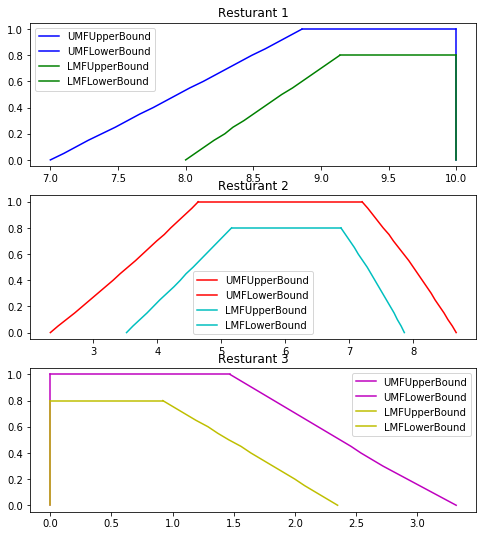

In [615]:
a7=implementing_KM(a5,a6)